In [110]:
import sys
sys.path.append('../')
import functions
exec(open('./functions.py').read())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
... OK (Got response in 0.47 seconds)
Writing emoji data to C:\Users\home\.demoji\codes.json ...
... OK


In [111]:
#load labelled data (generated in file 2.preprocessing)
data = pickle.load(open('data_n_models/eng_df_labelled.pkl', "rb"))
data.columns

Index(['index', 'user_id', 'user_statuses', 'name', 'tweet', 'retweets',
       'location', 'created', 'followers', 'is_user_verified',
       'favorite_count', 'in_reply_to_status_id', 'keyword', 'language',
       'clean', 'clean_vader', 'compound', 'lemma'],
      dtype='object')

# Labelling bot related tweets

After the observations of the dataset, it was noticed that there are accounts that offer special scripts to buy goods on zalando as well as tweets by users of such scripts. Since this data is not related to the goal of our project we decided to filter them out. 

It is decided that if a user name contains 'bot', 'bot_' or 'script' it is a bot tweet.
And if a tweet contains 'script','bot','bots, 'bot_', 'cook','cop' it is a bit tweet

In [114]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in df.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [46]:
#apply the function
bot_df = classify_bots(data)

C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4% of english tweets were classified as bots

In [47]:
#save the classified dataset
pickle.dump(bot_df, open(r'.\data_n_models\4.eng_df_bot_classified.pkl', 'wb'))

In [48]:
#count the number of bot and non bot related tweets
t = bot_df.bot.value_counts()
print(t)
t.loc[True] / (t.loc[False] + t.loc[True])

False    62536
True      2881
Name: bot, dtype: int64


0.04404053992081569

the majority of english speaking bots are about asos

         tweet
keyword       
asos      2169
bohoo        2
boohoo     133
zalando    577


<AxesSubplot:xlabel='keyword'>

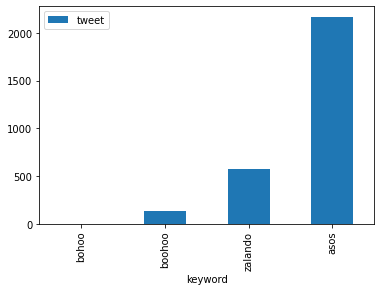

In [49]:
#print bot related tweets per company
print(bot_df[['keyword','tweet']][bot_df.bot == True].groupby(['keyword']).count())
bot_df[['keyword','tweet']][bot_df.bot == True].groupby(['keyword']).count().sort_values(by='tweet').plot.bar()

English no-bot tweets is just 3% about Zalando

         tweet
keyword       
asos     35240
bohoo      174
boohoo   24959
zalando   2163


<AxesSubplot:xlabel='keyword'>

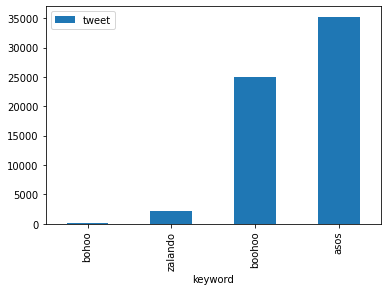

In [50]:
#print non bot related tweets per company
print(bot_df[['keyword','tweet']][bot_df.bot == False].groupby(['keyword']).count())
bot_df[['keyword','tweet']][bot_df.bot == False].groupby(['keyword']).count().sort_values(by='tweet').plot.bar()

In [51]:
#testing results by checking random 10 tweets
sample = bot_df[bot_df.bot == True].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

74758 iembot_gsp At 12:16 AM EDT, 2 W Fletcher [Henderson Co, NC] ASOS reports NON-TSTM WND GST of M47 MPH. KAVL ASOS https://t.co/gIPw4xGjmR
2372 iembot_gyx Mount Washington,NH (MWN) ASOS reports gust of 60 knots (69.1 mph) from WNW @ 1849Z -- KMWN 041849Z 30050G60KT 1/16SM FZFG BLSN VV000 M18/M18 RMK VRY LGT ICG SUN DMLY VSBL
38014 top100nowUK "ASOS" and 1 more hit the Top 100 iTunesUK Free Apps Chart! Description and more - https://t.co/vvHkdIy2NG https://t.co/9rSgljudqa
18931 tiffaimee @Hermesparcels you've sent me a new @ASOS_HeretoHelp tracking number but it doesn't exist on your website or your customer service bot chat.
69142 iembot_bis MINOT_INTL,ND (MOT) ASOS reports gust of 50 knots (57.5 mph) from W @ 0703Z -- KMOT 300754Z AUTO 28030G48KT 9SM BKN026 OVC032 M06/M12 A2953 RMK AO2 PK WND 27050/0703 SNB17E49 SLP015 P0000 T10561122
18466 iembot_ilx At 11:13 AM CDT, Peoria Intl Airport [Peoria Co, IL] ASOS reports NON-TSTM WND GST of M50 MPH https://t.co/Tuin4iSVI5
95265 iembot_t

# print 10 top likes about Zalando

issues:

1. lots of duplicates it text, but not 1-1

2. some tweets do not contain Zalando

3. still some bots 
"generate over 1000 zalando accounts in less then 4 hours!"

In [105]:
nobots = bot_df[bot_df.bot == False]

for i, value in nobots[nobots['keyword'] == 'zalando'].sort_values(by = 'compound', ascending=False)[86:96].tweet.iteritems():
    print(i, value)
    print('________________')

67806 Huge thanks to @Zalando &amp; @voluntireland for the fantastic career workshop with our clients yesterday! The team from Zalando offered advice, inspiration and practical CV and interview tips to help our clients on their job hunt. https://t.co/lmYDZRmpWK
________________
106420 With SAP behind its vision, #SAPInnovation Awards finalist @Zalando_Press created a robust, accurate and scalable model that optimized its financial operations and created a competitive advantage: https://t.co/LlNRkjkktq https://t.co/thQ8ApjOlf
________________
106370 With SAP behind its vision, #SAPInnovation Awards finalist @Zalando_Press created a robust, accurate and scalable model that optimized its financial operations and created a competitive advantage: https://t.co/RHiSy2Jo8E https://t.co/L2nQqNGzO9
________________
106422 With SAP behind its vision, #SAPInnovation Awards finalist @Zalando_Press created a robust, accurate and scalable model that optimized its financial operations and created a co

# print top 10 negative tweets about zalando

issues:

1. is it bot?
__________
73907 2x 39 today on Zalando, sadly my accounts are still bad despite my best efforts 😭

Thanks @FlareAIO @flash_proxy https://t.co/enSImFj0eH



In [107]:
for i, value in nobots[nobots['keyword'] == 'zalando'].sort_values(by = 'compound', ascending=True)[20:30].tweet.iteritems():
    print(i, value)
    print('________________')

13619 Fuck Zalando, all my homies hate Zalando
________________
106317 Do NOT buy zalando accounts from Paus#1994 (776006638636630016) or the following servers:
https://t.co/GBnlZRcIhK
https://t.co/WLetmP6gDg
https://t.co/GTpsFmW5Az

These are cr@ckt accounts, which is a criminal offense. If you get caught with them, you'll get in big trouble.
________________
9985 @clippedbypass @pytronik Cant send but zalando D: FUCK
________________
80280 Disgusting AD from @ZalandoTech @Zalando_Press Shameful !
________________
6 No 2nd attempt, no alternative #puntoposte location, no re-shipping your already-paid, already-packaged, already-labeled box... nope, just sent straight back to the warehouse and refunded. What an absolute waste of time, money, effort and #carbonemissions @Zalando shame on you
________________
67399 Plenty of big Zalando releases coming up. Waiting for @Rainbow_Proxy to invite me so i can show them how to kill it 🔥👹🌈
________________
28087 Big fuck u on the bitch who keeps

In [54]:
nobots.lemma

0                                                 money owe
1         virtualstyle try increase conversion rate larg...
2         virtualstyle try increase conversion rate larg...
3                    problem start adida sell latex website
4                               welcome world sneer disdain
                                ...                        
106510                               dress zalando gorgeous
106519             zalandopromote rose더로즈 therose stanworld
106521             zalandopromote rose더로즈 therose stanworld
106555    aha time hear zalando be n’t bad lazy long non...
106556     zalando account restock hour ready ringed planet
Name: lemma, Length: 62536, dtype: object

In [60]:
pos_zalando = nobots[(nobots.compound >= 0.5) & (nobots.keyword == 'zalando')]

In [101]:

str_pos_zalando = " ".join(pos_zalando.clean_vader)

In [99]:
counts = nltk.FreqDist(str_pos_zalando.split())
#Get 50 Most Common Words
print(counts.most_common(100))

[('the', 319), ('and', 301), ('Zalando', 243), ('for', 214), ('with', 193), ('this', 105), ('new', 101), ('zalando', 91), ('from', 88), ('you', 85), ('its', 79), ('And', 65), ('are', 61), ('set', 59), ('love.', 58), ('combined', 57), ('what', 56), ('can', 54), ('clothes.', 54), ('out', 53), ('have', 51), ('but', 49), ('that', 45), ('fashion', 40), ('about', 39), ('growth', 37), ('your', 36), ('like', 36), ('more', 34), ('clothing,', 34), ('our', 33), ('some', 33), ('platform', 32), ('just', 32), ('has', 31), ('The', 31), ('their', 30), ('will', 29), ('support', 28), ('was', 27), ('all', 27), ('online', 27), ('better', 26), ('Find', 26), ('they', 25), ('team', 25), ('it.', 24), ('company', 24), ('SAP', 24), ('not', 23), ('learn', 23), ('Shop', 23), ('great', 22), ('love', 22), ('last', 22), ('dresses,', 22), ('get', 21), ('million', 21), ('good', 21), ('Thanks', 21), ("afternoon's", 21), ('Alejandro', 21), ('Basterrechea,', 21), ('Head', 21), ('Procurement', 21), ('Excellence', 21), ('C

Word Cloud Saved Successfully


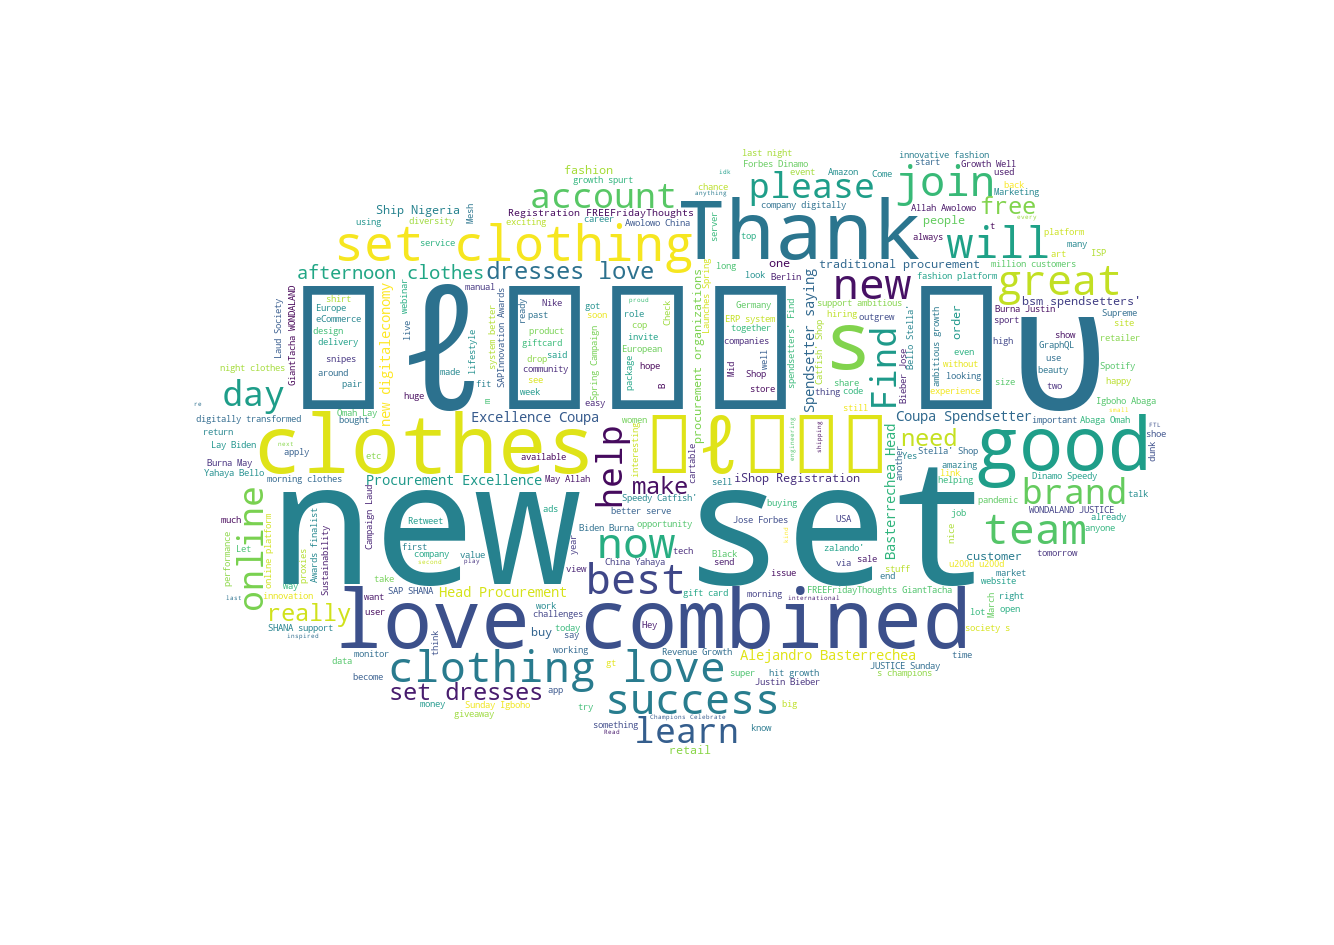

In [100]:
# Function to create a wordcloud
def create_wordcloud(tweet, path='data_n_models\wc_pos.png'):
    """ this function takes in two arguments, the path to save the file and the tweet"""
    mask = np.array(Image.open("data_n_models\cloud.png"))
    stopwords = set(STOPWORDS)
    stopwords.update(["boohoo", "asos",'Zalando'])
    wc = WordCloud(background_color='white', mask = mask, max_words=300, stopwords=stopwords, repeat=True)
    wc.generate(str(tweet))
    wc.to_file(path)
    print('Word Cloud Saved Successfully')
    display(Image.open(path))
#Creating wordcloud for all tweets
create_wordcloud(pos_zalando['clean_vader'].values)

# check german dataset for bots

as a result there is no bot related tweets in german dataset and the above used function does not work for german language, because 'bot' is found in a word 'angebot'

In [116]:
#load german data (generated in file 2.de_prep)
de_df = pickle.load(open('data_n_models/de_df_labelled.pkl', "rb"))
de_df = classify_bots(de_df)
de_df.head()

C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit eine wahl gewinnen stellt euch...,False
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn sie wieder dürfen playfullness,False
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news alle interessierten mitarbeiterinnen...,False
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber ist mi...,False
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab mich nur gefragt wofür dieser extra co...,False


In [119]:
de_df.bot.value_counts()

False    2680
True       29
Name: bot, dtype: int64

<AxesSubplot:xlabel='keyword', ylabel='count'>

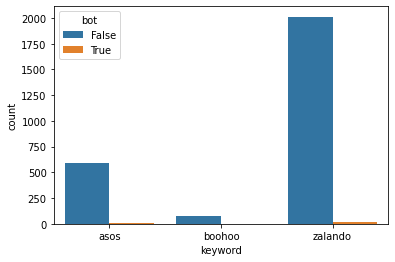

In [117]:
sns.countplot(x="keyword", hue='bot', data=de_df, order=['asos', 'boohoo', 'zalando'])

In [121]:
#testing results by checking random 10 tweets
sample = de_df[de_df.bot == True].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

1067 bumbsebiene @Giesel_er Hab mal Asos angeschrieben weil sie mir 5€ weniger erstattet haben weil das Produkt nach Kauf im Angebot war (die Jacke war kaputt) - richtig ausgerastet
1176 TorstenWieland Eine Webseite, die scheiße funktioniert. Keine Kontakt-Telefonnummer. Bei Twitter geht einem dafür ein Hilfe-Bot auf den Sack. ASOS ist in Sachen Kundenreklamationsmanagement total modern. Modern kacke.
518 iembot_grb At 12:59 AM CST, 2 SSE Wausau [Marathon Co, WI] ASOS reports NON-TSTM WND GST of M49 MPH. ASOS STATION KAUW WAUSAU AIRPORT. https://t.co/ULEIoyUa5j
1549 iembot_iln At 4:51 AM EDT, Kcmh John Glenn APT [Franklin Co, OH] ASOS reports NON-TSTM WND GST of M46 MPH https://t.co/chUI2lduvG
674 iembot_mqt At 3:54 AM EST, 1 NW Kingsford [Dickinson Co, MI] ASOS reports NON-TSTM WND GST of M53 MPH. ASOS STATION KIMT KINGSFORD. https://t.co/fksi6ip9ko
2570 StefanBVB @Zalando Danke für dieses Hammer Angebot per E-Mail!!! Das wollte ich sowieso haben und hätte beinahe kürzlich zum UVP gek